In [19]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from catboost import CatBoostClassifier, Pool, CatBoostRegressor, CatBoost
from catboost import cv


In [2]:
data = pd.read_csv('C:/Users/KarimovDO/Documents/GitHub/model1/yana2.csv', sep=';')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669 entries, 0 to 668
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   group         669 non-null    int64
 1   rs238406_G    669 non-null    int64
 2   rs238406_T    669 non-null    int64
 3   rs13181_C     669 non-null    int64
 4   rs13181_A     669 non-null    int64
 5   rs861539_C    669 non-null    int64
 6   rs861539_T    669 non-null    int64
 7   rs3218536_C   669 non-null    int64
 8   rs3218536_T   669 non-null    int64
dtypes: int64(9)
memory usage: 47.2 KB


In [9]:
data['group'].unique()

array([1, 0], dtype=int64)

In [10]:
data = data[data['group'] !=2] 
data = data.reset_index(drop= True)

In [11]:
for i in range(len(data['group'])):
    if data.loc[i,'group'] == 2:
        data.loc[i,'group'] = 1

In [12]:
data['group'].unique()

array([1, 0], dtype=int64)

In [13]:
X = data.drop(['group'], axis=1)
y = data['group']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.25, 
    random_state=12345,
    stratify=y
)

print(f"Количество строк в y_train по классам: {np.bincount(y_train)}")
print(f"Количество строк в y_test по классам: {np.bincount(y_test)}")

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

Количество строк в y_train по классам: [258 175]
Количество строк в y_test по классам: [87 58]
(433, 8)
(433,)
(145, 8)
(145,)


In [9]:
scores = np.zeros((22, 22))
best_model_tree = None
best_result = 0
for i in range(1,11):
    for j in range(2,22): 
        model = DecisionTreeClassifier(random_state=12345, max_depth=i, max_leaf_nodes=j)
        model.fit(X_train, y_train)
        result = model.score(X_test, y_test)
        scores[i,j] = result
        if result > best_result:
            best_result = result 
            best_max_depth = i
            best_max_leaf_nodes = j
            best_model_tree = model
print(f'best max_depth = {best_max_depth}, best_max_leaf_nodes {best_max_leaf_nodes}: {best_result}')

best max_depth = 6, best_max_leaf_nodes 20: 0.6551724137931034


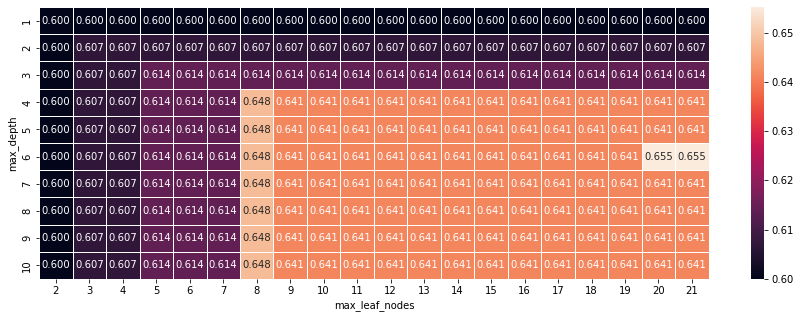

In [10]:
plt.figure(figsize=(15, 5))
ax = sns.heatmap(scores[1:11,2:22], annot=True, fmt=".3f", linewidth=.5)
ax.set(xlabel="max_leaf_nodes", ylabel="max_depth", xticklabels=range(2,22), yticklabels=range(1,11));

In [11]:
scores = np.zeros((22, 22))
best_model_tree_cross = None
best_result = 0
for i in range(1,11):
    for j in range(2,22): 
        model = DecisionTreeClassifier(random_state=12345, max_depth=i, max_leaf_nodes=j)
        model.fit(X_train, y_train)
        result = (cross_val_score(model, X_train, y_train, cv=5)).mean()
        scores[i,j] = result
        if result > best_result:
            best_result = result 
            best_max_depth = i
            best_max_leaf_nodes = j
            best_model_tree_cross = model
print(f'best max_depth = {best_max_depth}, best_max_leaf_nodes {best_max_leaf_nodes}: {best_result}')

best max_depth = 4, best_max_leaf_nodes 10: 0.625821972734563


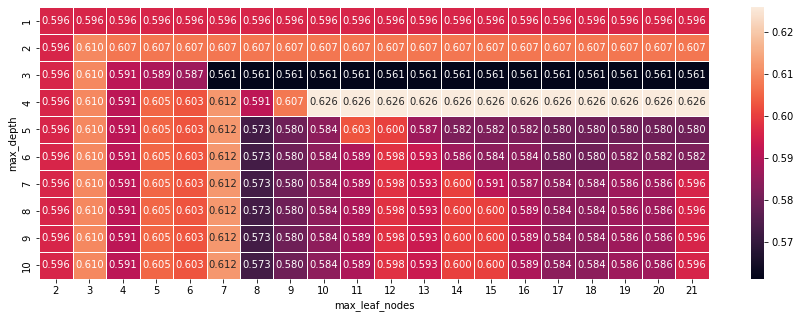

In [12]:
plt.figure(figsize=(15, 5))
ax = sns.heatmap(scores[1:11,2:22], annot=True, fmt=".3f", linewidth=.5)
ax.set(xlabel="max_leaf_nodes", ylabel="max_depth", xticklabels=range(2,22), yticklabels=range(1,11));

In [13]:
#param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}

param_grid = {'criterion':['entropy'], 'max_depth': np.arange(1, 21),  'max_leaf_nodes':np.arange(2, 22)}

dtree_model=DecisionTreeClassifier()

dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=5)

dtree_gscv.fit(X_train, y_train)
results = pd.DataFrame(dtree_gscv.cv_results_)
dtree_gscv.best_params_


{'criterion': 'entropy', 'max_depth': 4, 'max_leaf_nodes': 11}

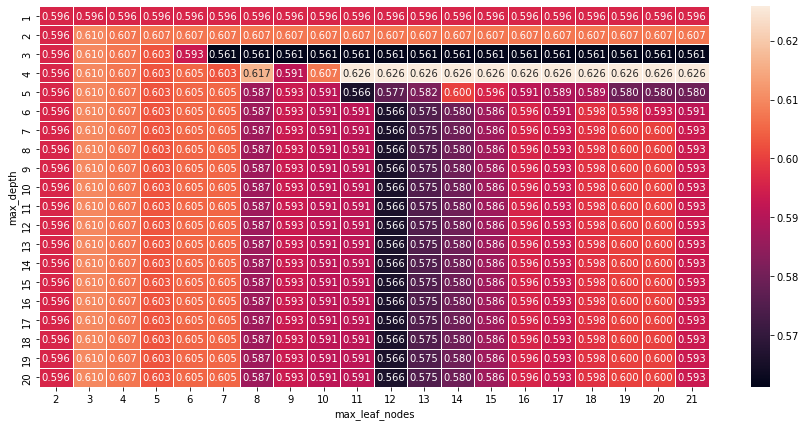

In [14]:
scores = np.array(results.mean_test_score).reshape(20, 20)

plt.figure(figsize=(15, 7))
ax = sns.heatmap(scores[0:21,0:22], annot=True, fmt=".3f", linewidth=.5)
ax.set(xlabel="max_leaf_nodes", ylabel="max_depth", xticklabels=range(2,22), yticklabels=range(1,21));


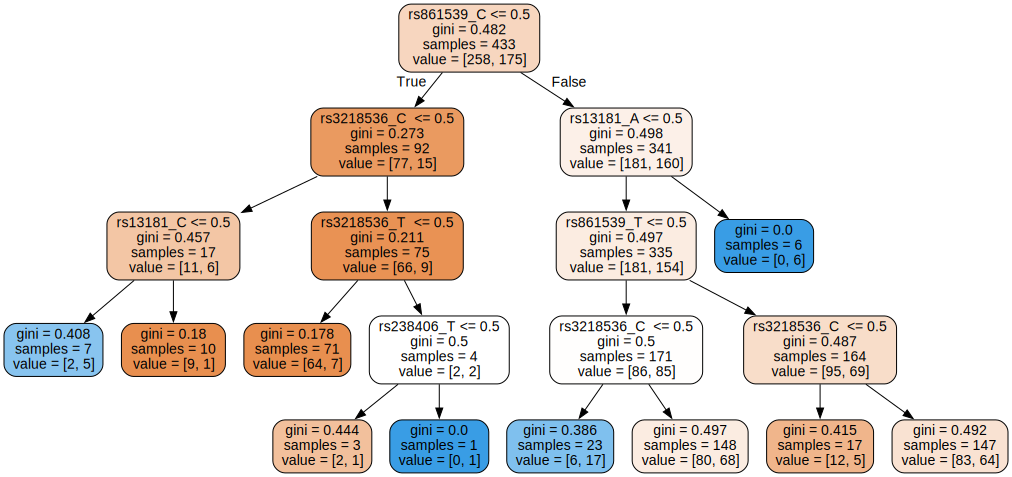

In [15]:
from sklearn import tree
from graphviz import Source
graph = Source(tree.export_graphviz(best_model_tree_cross, out_file=None,
                                    feature_names=data.columns[1:],
                                    #class_names=['Not survived', 'Survived'],
                                    filled=True, rounded=True
                                   ))
graph

In [16]:
best_model_rnd = None
best_result = 0
for est in range(1, 11):
    model = RandomForestClassifier(random_state=12345, n_estimators=est) # обучите модель с заданным количеством деревьев
    model.fit(X_train, y_train) # обучите модель на тренировочной выборке
    result = model.score(X_test, y_test) # посчитайте качество модели на валидационной выборке
    if result > best_result:
        best_result = result # сохраните наилучшую модель
        best_n_estimators = est#  сохраните наилучшее значение метрики accuracy на валидационных данных
        best_model_rnd = model
print(f'best_n_estimators = {best_n_estimators} : {best_result}')

best_n_estimators = 10 : 0.6620689655172414


In [17]:
grid = { 
    'n_estimators': np.arange(1, 11),
    'max_features': ['sqrt', 'log2'],
    'max_depth' : np.arange(1, 11),
    'criterion' :['gini', 'entropy'],
    'random_state' : [18]
}

rf_cv = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid, cv= 5)
rf_cv.fit(X_train, y_train)
results = pd.DataFrame(dtree_gscv.cv_results_)
print(rf_cv.best_params_)
print(rf_cv.best_score_)




{'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 8, 'random_state': 18}
0.6398556535685646


In [18]:
grid = { 
    'n_estimators': np.arange(1, 11),
    'max_features': ['sqrt'],
    'max_depth' : np.arange(1, 11),
    'criterion' :['entropy'],
    'random_state' : [18]
}

rf_cv = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid, cv= 5)
rf_cv.fit(X_train, y_train)
results = pd.DataFrame(rf_cv.cv_results_)
rf_cv.best_params_
rf_cv.best_score_

0.6329056402031543

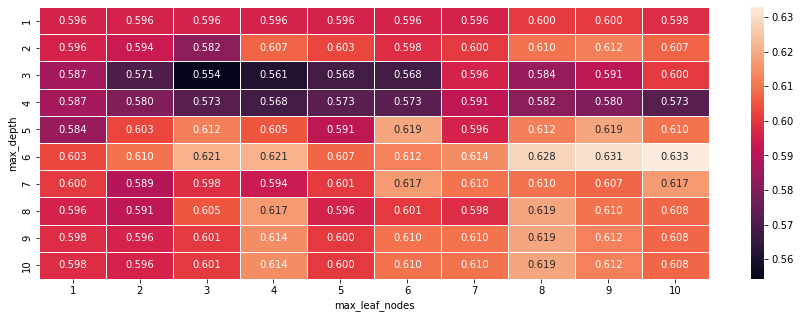

In [19]:
scores = np.array(results.mean_test_score).reshape(10, 10)

plt.figure(figsize=(15, 5))
ax = sns.heatmap(scores, annot=True, fmt=".3f", linewidth=.5)
ax.set(xlabel="max_leaf_nodes", ylabel="max_depth", xticklabels=range(1,11), yticklabels=range(1,11));

In [20]:
model_lgst = LogisticRegression(solver='liblinear',
    # норма для регуляризации. 
    penalty='l2',
    # параметр регуляризации. Чем меньше, тем сильнее регуляризация. Положительный.
    C=1,
    # параметр для остановки поиска решения.
    tol=1e-4,
    # Так как распознается 2 класса.
    multi_class='ovr')
model_lgst.fit(X_train, y_train) # обучите модель на тренировочной выборке
result = model_lgst.score(X_test, y_test) # посчитайте качество модели на валидационной выборке
print(f'result = {result}')

result = 0.6068965517241379


In [21]:
KNeig_best = None
best_result = 0
for neigh in range(1, 11):
    model = KNeighborsClassifier(n_neighbors = neigh, metric = 'minkowski', p = 2)
    model.fit(X_train, y_train) # обучите модель на тренировочной выборке
    result = model.score(X_test, y_test) # посчитайте качество модели на валидационной выборке
    if result > best_result:
        best_result = result # сохраните наилучшую модель
        best_n_neighbors = neigh#  сохраните наилучшее значение метрики accuracy на валидационных данных
        KNeig_best = model

print(f'best_n_neighbors = {best_n_neighbors} : {best_result}')

best_n_neighbors = 7 : 0.6275862068965518


In [22]:
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10]:
    for C in [0.001, 0.01, 0.1, 1, 10]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = svm.score(X_test, y_test)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Best score: 0.68
Best parameters: {'C': 1, 'gamma': 10}


In [23]:
clf = SVC()
params = {'C': np.logspace(0, 5, 5),
          'gamma': np.logspace(0, 5, 5)}

random_search = RandomizedSearchCV(
    estimator=clf, param_distributions=params, n_iter=25, n_jobs=-1,
    cv=StratifiedKFold(n_splits=5)
)
random_search.fit(X_train, y_train)
print(random_search.best_params_)
print(random_search.best_score_)

{'gamma': 1.0, 'C': 1.0}
0.6050788559208767


best_model_tree
best_model_tree_cross
dtree_gscv
best_model_rnd
rf_cv
model_lgst
logreg
KNeig_best
svm

C:\Users\KarimovDO\AppData\Local\Temp\ipykernel_13052\221736913.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
C:\Users\KarimovDO\AppData\Local\Temp\ipykernel_13052\221736913.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
C:\Users\KarimovDO\AppData\Local\Temp\ipykernel_13052\221736913.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
C:\Users\KarimovDO\AppData\Local\Temp\ipykernel_13052\221736913.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
C:\Users\KarimovDO\AppData\Local\Temp\ipykernel_13052\221736913.

,Classifier,Accuracy
0,model_lgst,0.606897
0,KNeig_best,0.627586
0,best_model_tree_cross,0.641379
0,dtree_gscv,0.648276
0,best_model_tree,0.655172
0,best_model_rnd,0.662069
0,rf_cv,0.668966
0,svm,0.682759


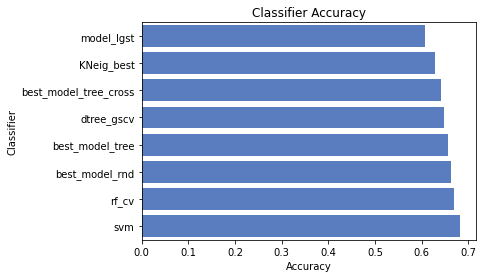

In [24]:
log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

acc_dict = {}

acc_dict['best_model_tree'] = best_model_tree.score(X_test, y_test)
acc_dict['best_model_tree_cross'] = best_model_tree_cross.score(X_test, y_test)
acc_dict['dtree_gscv'] = dtree_gscv.score(X_test, y_test)
acc_dict['best_model_rnd'] = best_model_rnd.score(X_test, y_test)
acc_dict['rf_cv'] = rf_cv.score(X_test, y_test)
acc_dict['model_lgst'] = model_lgst.score(X_test, y_test)
#acc_dict['logreg'] = logreg.score(X_test, y_test)
acc_dict['KNeig_best'] = KNeig_best.score(X_test, y_test)
acc_dict['svm'] = svm.score(X_test, y_test)

for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] 
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log.sort_values(by='Accuracy'), color="b")

display(log.sort_values(by='Accuracy'))

C:\Users\KarimovDO\AppData\Local\Temp\ipykernel_13052\221736913.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
C:\Users\KarimovDO\AppData\Local\Temp\ipykernel_13052\221736913.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
C:\Users\KarimovDO\AppData\Local\Temp\ipykernel_13052\221736913.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
C:\Users\KarimovDO\AppData\Local\Temp\ipykernel_13052\221736913.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
C:\Users\KarimovDO\AppData\Local\Temp\ipykernel_13052\221736913.

,Classifier,Accuracy
0,model_lgst,0.606897
0,KNeig_best,0.627586
0,best_model_tree_cross,0.641379
0,dtree_gscv,0.648276
0,best_model_tree,0.655172
0,best_model_rnd,0.662069
0,rf_cv,0.668966
0,svm,0.682759


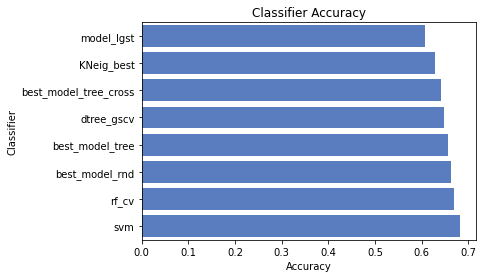

In [25]:
log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

acc_dict = {}

acc_dict['best_model_tree'] = best_model_tree.score(X_test, y_test)
acc_dict['best_model_tree_cross'] = best_model_tree_cross.score(X_test, y_test)
acc_dict['dtree_gscv'] = dtree_gscv.score(X_test, y_test)
acc_dict['best_model_rnd'] = best_model_rnd.score(X_test, y_test)
acc_dict['rf_cv'] = rf_cv.score(X_test, y_test)
acc_dict['model_lgst'] = model_lgst.score(X_test, y_test)
#acc_dict['logreg'] = logreg.score(X_test, y_test)
acc_dict['KNeig_best'] = KNeig_best.score(X_test, y_test)
acc_dict['svm'] = svm.score(X_test, y_test)

for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] 
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log.sort_values(by='Accuracy'), color="b")

display(log.sort_values(by='Accuracy'))

In [26]:
train_predictions = dtree_gscv.predict(X_test)
acc = accuracy_score(y_test, train_predictions)
print(acc)

0.6482758620689655


In [27]:
dclf = DummyClassifier(strategy = 'most_frequent', random_state = 0)

dclf.fit(X_train, y_train)
score = dclf.score(X_test, y_test)

print(score)

0.6


<Figure size 432x288 with 0 Axes>

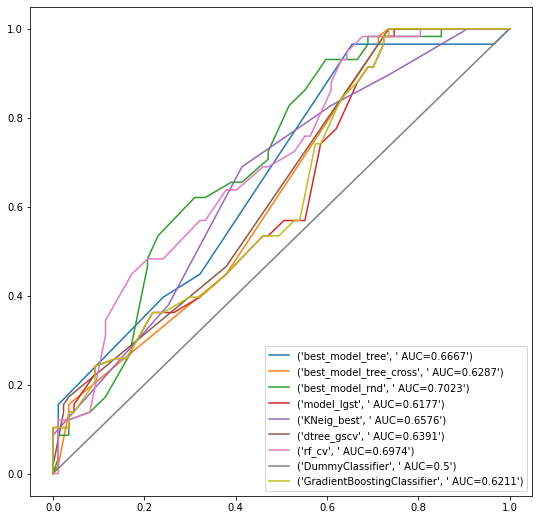

In [43]:
plt.figure(0).clf ();
plt.figure(figsize=(9, 9));

y_pred = best_model_tree.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve (y_test, y_pred)
auc = round(metrics.roc_auc_score (y_test, y_pred), 4)
plt.plot (fpr,tpr,label=('best_model_tree', " AUC="+str(auc)));

y_pred = best_model_tree_cross.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve (y_test, y_pred)
auc = round(metrics.roc_auc_score (y_test, y_pred), 4)
plt.plot (fpr,tpr,label=('best_model_tree_cross', " AUC="+str(auc)));

y_pred = best_model_rnd.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve (y_test, y_pred)
auc = round(metrics.roc_auc_score (y_test, y_pred), 4)
plt.plot (fpr,tpr,label=('best_model_rnd', " AUC="+str(auc)));

y_pred = model_lgst.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve (y_test, y_pred)
auc = round(metrics.roc_auc_score (y_test, y_pred), 4)
plt.plot (fpr,tpr,label=('model_lgst', " AUC="+str(auc)));

#y_pred = logreg.predict_proba(X_test)[:, 1]
#fpr, tpr, _ = metrics.roc_curve (y_test, y_pred)
#auc = round(metrics.roc_auc_score (y_test, y_pred), 4)
#plt.plot (fpr,tpr,label=('logreg', " AUC="+str(auc)));

y_pred = KNeig_best.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve (y_test, y_pred)
auc = round(metrics.roc_auc_score (y_test, y_pred), 4)
plt.plot (fpr,tpr,label=('KNeig_best', " AUC="+str(auc)));

#y_pred = svm.predict_proba(X_test)[:, 1]
#fpr, tpr, _ = metrics.roc_curve (y_test, y_pred)
#auc = round(metrics.roc_auc_score (y_test, y_pred), 4)
#plt.plot (fpr,tpr,label=('svm', " AUC="+str(auc)));

y_pred = dtree_gscv.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve (y_test, y_pred)
auc = round(metrics.roc_auc_score (y_test, y_pred), 4)
plt.plot (fpr,tpr,label=('dtree_gscv', " AUC="+str(auc)));

y_pred = rf_cv.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve (y_test, y_pred)
auc = round(metrics.roc_auc_score (y_test, y_pred), 4)
plt.plot (fpr,tpr,label=('rf_cv', " AUC="+str(auc)));

y_pred = dclf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve (y_test, y_pred)
auc = round(metrics.roc_auc_score (y_test, y_pred), 4)
plt.plot (fpr,tpr,label=('DummyClassifier', " AUC="+str(auc)));
y_pred = clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve (y_test, y_pred)
auc = round(metrics.roc_auc_score (y_test, y_pred), 4)
plt.plot (fpr,tpr,label=('GradientBoostingClassifier', " AUC="+str(auc)));
#add legend
plt.legend();

In [34]:
best_model_rnd.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=1845187042),
 DecisionTreeClassifier(max_features='auto', random_state=1675701733),
 DecisionTreeClassifier(max_features='auto', random_state=1358822685),
 DecisionTreeClassifier(max_features='auto', random_state=561383553),
 DecisionTreeClassifier(max_features='auto', random_state=789925284),
 DecisionTreeClassifier(max_features='auto', random_state=170765737),
 DecisionTreeClassifier(max_features='auto', random_state=878579710),
 DecisionTreeClassifier(max_features='auto', random_state=1402032510),
 DecisionTreeClassifier(max_features='auto', random_state=290876773),
 DecisionTreeClassifier(max_features='auto', random_state=137773602)]

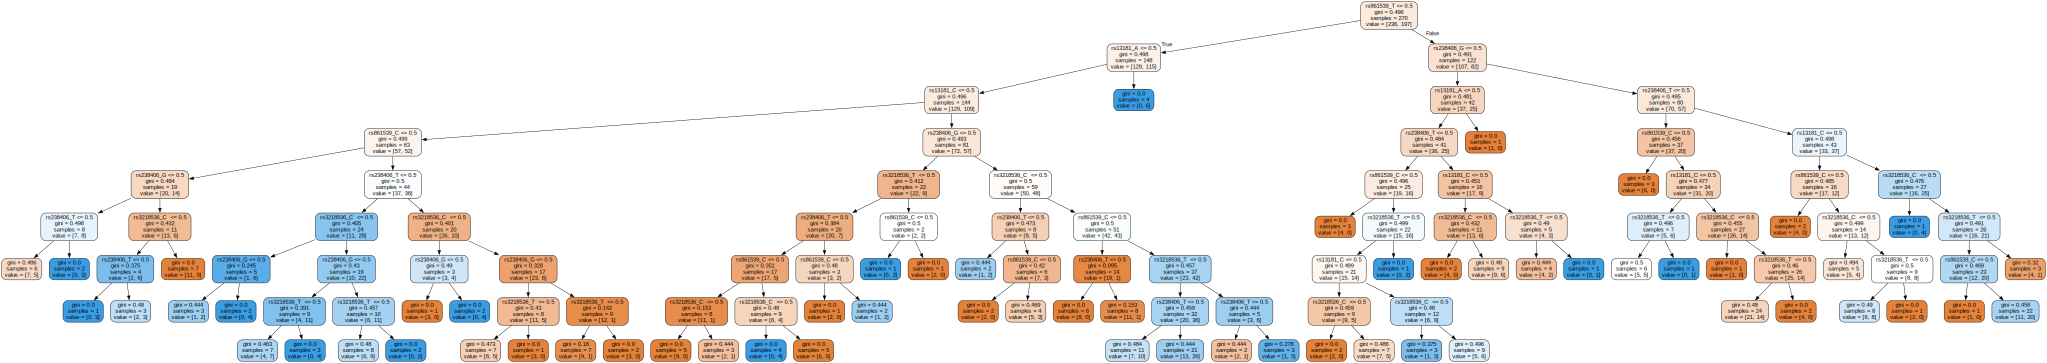

In [40]:
graph = Source(tree.export_graphviz(best_model_rnd.estimators_[0], out_file=None,
                                    feature_names=data.columns[1:],
                                    #class_names=['Not survived', 'Survived'],
                                    filled=True, rounded=True
                                   ))
graph

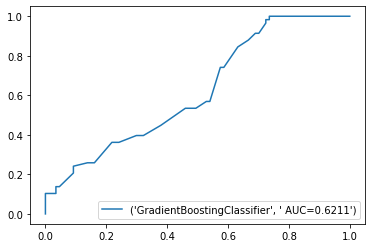

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                    max_depth=1, random_state=0).fit(X_train, y_train)
y_pred = clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve (y_test, y_pred)
auc = round(metrics.roc_auc_score (y_test, y_pred), 4)
plt.plot (fpr,tpr,label=('GradientBoostingClassifier', " AUC="+str(auc)));

#add legend
plt.legend();

In [15]:
X_test.columns

Index(['rs238406_G', 'rs238406_T', 'rs13181_C', 'rs13181_A', 'rs861539_C',
       'rs861539_T', 'rs3218536_C ', 'rs3218536_T '],
      dtype='object')

In [28]:
cat_features = ['rs238406_G', 'rs238406_T', 'rs13181_C', 'rs13181_A', 'rs861539_C',
       'rs861539_T', 'rs3218536_C ', 'rs3218536_T ']
tunned_model = CatBoostClassifier(
    random_seed=63,
    iterations=1000,
    learning_rate=0.03,
    l2_leaf_reg=3,
    bagging_temperature=1,
    random_strength=1,
    one_hot_max_size=2,
    leaf_estimation_method='Newton',
    depth=6,
    custom_loss=['AUC', 'Accuracy']
)
tunned_model.fit(
    X_train, y_train,
    cat_features=cat_features,
    logging_level='Silent',
    eval_set=(X_test, y_test),
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

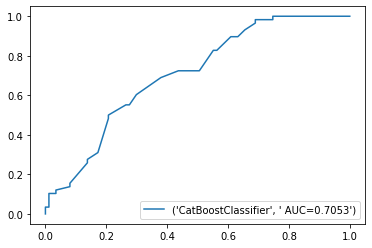

In [29]:
y_pred = tunned_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve (y_test, y_pred)
auc = round(metrics.roc_auc_score (y_test, y_pred), 4)
plt.plot (fpr,tpr,label=('CatBoostClassifier', " AUC="+str(auc)));

#add legend
plt.legend();